<a href="https://colab.research.google.com/github/Daniel-B-Oliveira/Estatistica-Computacional/blob/main/aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação e Gráficos


In [25]:
# pacote para trab com dados
import pandas as pd

In [39]:
df = pd.read_csv("/content/telecom_users.txt", sep = ";")
#df = pd.read_csv("/content/telecom_users.csv", sep = ";")
#df = pd.read_excel("/content/telecom_users.xlsx")

In [40]:
df.head()
nomes = df.columns

In [41]:
df.shape

(5986, 22)

In [42]:
df = df.dropna(how="any", axis = 0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5984 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  5984 non-null   int64  
 1   IDCliente               5984 non-null   object 
 2   Genero                  5984 non-null   object 
 3   Aposentado              5984 non-null   int64  
 4   Casado                  5984 non-null   object 
 5   Dependentes             5984 non-null   object 
 6   MesesComoCliente        5984 non-null   int64  
 7   ServicoTelefone         5984 non-null   object 
 8   MultiplasLinhas         5984 non-null   object 
 9   ServicoInternet         5984 non-null   object 
 10  ServicoSegurancaOnline  5984 non-null   object 
 11  ServicoBackupOnline     5984 non-null   object 
 12  ProtecaoEquipamento     5984 non-null   object 
 13  ServicoSuporteTecnico   5984 non-null   object 
 14  ServicoStreamingTV      5984 non-null   objec

In [43]:
tab_pg = df['FormaPagamento'].value_counts()
print(tab_pg)

FormaPagamento
BoletoEletronico    2006
BoletoImpresso      1368
DebitoAutomatico    1307
CartaoCredito       1303
Name: count, dtype: int64


<Axes: >

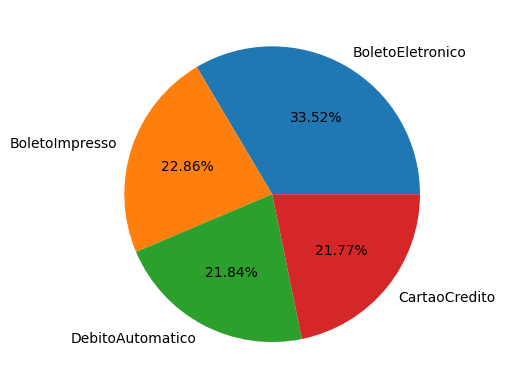

In [44]:
#tab_pg.plot(kind = 'pie', autopct = '%1.2f', ylabel='')
tab_pg.plot(kind = 'pie', autopct = '%1.2f%%', ylabel='')   #Com %
#tab_pg.plot(kind = 'pie', autopct = '%.2f', ylabel='')

<Axes: >

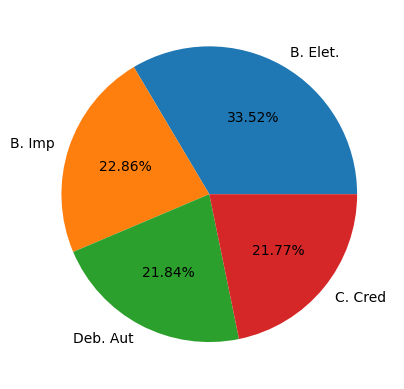

In [45]:
nomes = ["B. Elet.", "B. Imp", "Deb. Aut", "C. Cred"]
tab_pg = df['FormaPagamento'].value_counts()    #Nomes escolhidos
tab_pg.plot(kind = 'pie', autopct = '%1.2f%%', labels = nomes, ylabel = '')

<Axes: xlabel='Forma de Pagamento', ylabel='Quantidade'>

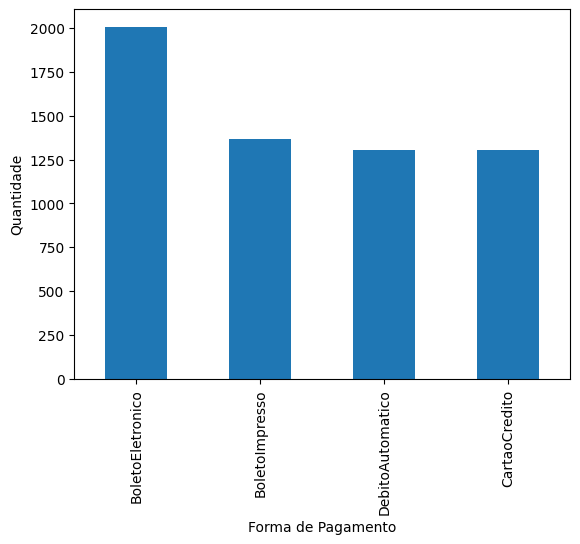

In [46]:
tab_pg.plot(kind = 'bar', ylabel = "Quantidade", xlabel = "Forma de Pagamento")

<Axes: xlabel='Meses', ylabel='Frequency'>

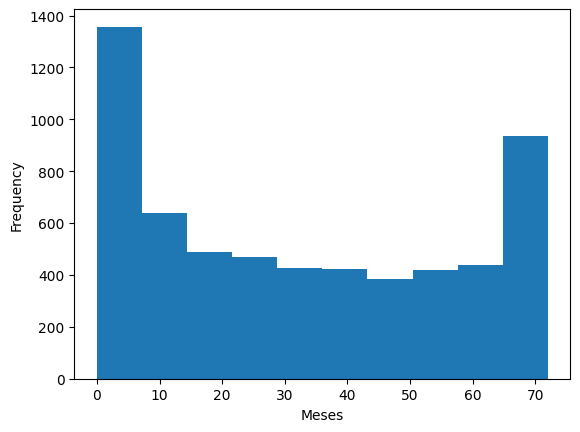

In [47]:
df['MesesComoCliente'].plot(kind = 'hist', xlabel="Meses")

In [48]:
!pip install plotly

In [49]:
import plotly.express as px

In [50]:
fig = px.histogram(df, x='TotalGasto', title="Total Gasto")     #Erro, 'TotalGasto' não está como numeric
fig.show()

In [51]:
df['TotalGasto'] = pd.to_numeric(df['TotalGasto'], errors="coerce")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5984 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  5984 non-null   int64  
 1   IDCliente               5984 non-null   object 
 2   Genero                  5984 non-null   object 
 3   Aposentado              5984 non-null   int64  
 4   Casado                  5984 non-null   object 
 5   Dependentes             5984 non-null   object 
 6   MesesComoCliente        5984 non-null   int64  
 7   ServicoTelefone         5984 non-null   object 
 8   MultiplasLinhas         5984 non-null   object 
 9   ServicoInternet         5984 non-null   object 
 10  ServicoSegurancaOnline  5984 non-null   object 
 11  ServicoBackupOnline     5984 non-null   object 
 12  ProtecaoEquipamento     5984 non-null   object 
 13  ServicoSuporteTecnico   5984 non-null   object 
 14  ServicoStreamingTV      5984 non-null   objec

In [52]:
fig = px.histogram(df, x="TotalGasto", title="Total Gasto")
fig.show()

In [53]:
fig = px.histogram(df, x='TotalGasto', title="Total Gasto")
fig.update_layout(yaxis_title = "Frequencia", xaxis_title = "Total Gasto")

In [65]:
#Churm
fig = px.scatter(df, x="MesesComoCliente", y="TotalGasto", title='', color='Churn')
fig.update_layout(yaxis_title="Total Gasto", xaxis_title="Meses")
fig.show()

In [60]:
df.columns

Index(['Codigo', 'IDCliente', 'Genero', 'Aposentado', 'Casado', 'Dependentes',
       'MesesComoCliente', 'ServicoTelefone', 'MultiplasLinhas',
       'ServicoInternet', 'ServicoSegurancaOnline', 'ServicoBackupOnline',
       'ProtecaoEquipamento', 'ServicoSuporteTecnico', 'ServicoStreamingTV',
       'ServicoFilmes', 'TipoContrato', 'FaturaDigital', 'FormaPagamento',
       'ValorMensal', 'TotalGasto', 'Churn'],
      dtype='object')

In [61]:
fig = px.pie(values=df['FormaPagamento'].value_counts(), title="", names=nomes)
fig.show()

In [64]:
for coluna in df.columns:
  grafico = px.histogram(df, x=coluna, color="Churn", text_auto=True)
  grafico.show()

In [66]:
for coluna in df.columns:
  grafico = px.histogram(df, x=coluna, color="FormaPagamento", text_auto=True)
  grafico.show()